In [80]:
"""
@author: vaaruni
"""

'\n@author: vaaruni\n'

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
#load cleaned HDI data for further EDA
HDI_df = pd.read_json('cleanedHDIdata.json')

In [64]:
HDI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 189 non-null    object 
 1   Human Development Index (HDI)           189 non-null    float64
 2   Expected years of schooling             189 non-null    float64
 3   Gross national income (GNI) per capita  189 non-null    object 
 4   HDI rank                                189 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 7.5+ KB


In [65]:
brate_df = pd.read_json('cleanedBirthRate.json')

In [66]:
avg_brate = brate_df.groupby(['Country'])['Birth rate'].mean()
avg_brate = avg_brate.reset_index(name = 'Avg. Birth rate')

In [67]:
avg_brate.describe()

,Avg. Birth rate
count,193.000000
mean,56.036277
std,46.145378
min,1.000000
25%,16.221053
50%,46.585714
75%,83.776923
max,187.460000


We have HDI data for only 189 countries but we have the average birth rate data for 193 countries. Hence, we will remove the countries for which we don't have the HDI data.

In [68]:
brate_hdi = pd.merge(HDI_df, avg_brate, on='Country')
brate_hdi["Gross national income (GNI) per capita"] = brate_hdi["Gross national income (GNI) per capita"].replace({',':''}, regex = True)
brate_hdi["Gross national income (GNI) per capita"] = pd.to_numeric(brate_hdi["Gross national income (GNI) per capita"])

In [69]:
brate_hdi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 186 non-null    object 
 1   Human Development Index (HDI)           186 non-null    float64
 2   Expected years of schooling             186 non-null    float64
 3   Gross national income (GNI) per capita  186 non-null    int64  
 4   HDI rank                                186 non-null    int64  
 5   Avg. Birth rate                         186 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 10.2+ KB


In [70]:
brate_hdi.to_json('./brateHDIdata.json', orient='records')

In [71]:
# To find the missing countries in Birth rate data set
for a in list(HDI_df['Country']):
  if(a in list(brate_hdi['Country'])):
    pass
  else:
    print(a)

Hong Kong, China (SAR)
Liechtenstein
Palestine, State of


In [72]:
# To find the missing countries in HDI dataset
for a in list(avg_brate['Country']):
  if(a in list(brate_hdi['Country'])):
    pass
  else:
    print(a)

Cook Islands
Democratic People's Republic of Korea
Nauru
Niue
San Marino
Somalia
Tuvalu


Correlation between every column in the merged HDI and birth rate dataframe

In [73]:
#correlation matrix
corrM = brate_hdi.corr()
print(corrM)


                                        Human Development Index (HDI)   \
Human Development Index (HDI)                                 1.000000   
Expected years of schooling                                   0.903962   
Gross national income (GNI) per capita                        0.813569   
HDI rank                                                     -0.990271   
Avg. Birth rate                                              -0.814447   

                                        Expected years of schooling  \
Human Development Index (HDI)                              0.903962   
Expected years of schooling                                1.000000   
Gross national income (GNI) per capita                     0.692694   
HDI rank                                                  -0.900856   
Avg. Birth rate                                           -0.701565   

                                        Gross national income (GNI) per capita  \
Human Development Index (HDI)                 

Text(0, 0.5, 'Avg. Birth rate')

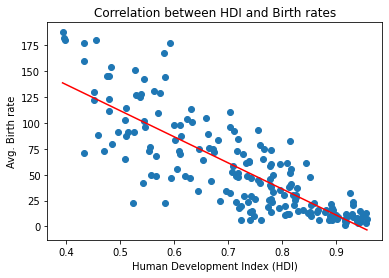

In [74]:
x=brate_hdi['Human Development Index (HDI) ']
y=brate_hdi['Avg. Birth rate']
correlation = y.corr(x)
correlation

# plotting the data
plt.scatter(x, y)
  
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

# adds the title
plt.title('Correlation between HDI and Birth rates')
  

# Labelling axes
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Avg. Birth rate')



Negative correlation: With the increase in HDI, the average adolescent birth rates seem to decrease. Hence, countries with higher HDI are likely to have lower adolescent birth rates.

     HDI rank  Avg. Birth rate
0           1         7.144444
1           2        13.189474
2           2         3.794737
3           4        11.727778
4           6         9.310526
..        ...              ...
181       185        71.350000
182       185       159.400000
183       187       179.780000
184       188       182.066667
185       189       187.460000

[186 rows x 2 columns]


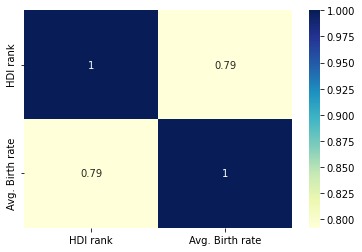

In [75]:
# checking correlation between hdi rank and birth rate using heatmap
import seaborn as sns

hdir_br_df=brate_hdi[['HDI rank','Avg. Birth rate']]
print(hdir_br_df)


#ploting the heatmap for correlation
hm = sns.heatmap(hdir_br_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying the plotted heatmap
plt.show()

Positive Correlation: Lower HDI ranks have higher numerical values and vice-versa. The countries with top ranks i.e. lower numerical values have lower adolescent birth rates. Similarly, the countries with lowest ranks (higher numerical values) have higher adolescent birth rates.

     Expected years of schooling  Avg. Birth rate
0                           18.1         7.144444
1                           18.7        13.189474
2                           16.3         3.794737
3                           19.1        11.727778
4                           17.0         9.310526
..                           ...              ...
181                         11.1        71.350000
182                          5.3       159.400000
183                          7.3       179.780000
184                          7.6       182.066667
185                          6.5       187.460000

[186 rows x 2 columns]


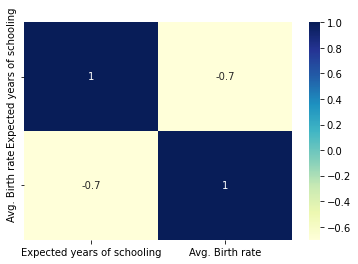

In [76]:
# checking correlation between expected yrs of schooling and birth rate using heatmap
import seaborn as sns

sch_br_df=brate_hdi[['Expected years of schooling','Avg. Birth rate']]
print(sch_br_df)


#ploting the heatmap for correlation
hm = sns.heatmap(sch_br_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying the plotted heatmap
plt.show()

Negative correlation: Indicates that with the increase in expected years of schooling, the average adolescence birth rate for a country tends to decrease.

     Gross national income (GNI) per capita  Avg. Birth rate
0                                     66494         7.144444
1                                     68371        13.189474
2                                     69394         3.794737
3                                     54682        11.727778
4                                     55314         9.310526
..                                      ...              ...
181                                     754        71.350000
182                                    2003       159.400000
183                                    1555       179.780000
184                                     993       182.066667
185                                    1201       187.460000

[186 rows x 2 columns]


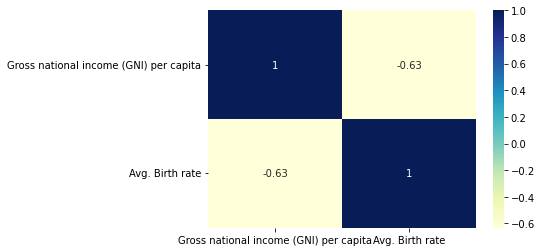

In [77]:
# checking correlation between gross national income and birth rate using heatmap
import seaborn as sns

gni_br_df=brate_hdi[['Gross national income (GNI) per capita','Avg. Birth rate']]
print(gni_br_df)


#ploting the heatmap for correlation
hm = sns.heatmap(gni_br_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying the plotted heatmap
plt.show()

Negative correlation: Higher the per capita Gross National Income for a country, the lower is its adolescent birth rate.